In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB


In [3]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

**Loading Test data set**

In [4]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**Viewing test and train data sets**

In [6]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [7]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**Inspecting features that affect the results**

In [8]:
emb = train_data.loc[train_data.Embarked == 'S']["Survived"]
rate_emb = sum(emb)/len(emb)

print("% of people who emarked from S who survived:",rate_emb)

% of people who emarked from S who survived: 0.33695652173913043


In [9]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [10]:
emb = train_data.loc[train_data.Embarked == 'S']["Survived"]
rate_emb = sum(emb)/len(emb)

print("% of people who emarked from S who survived:",rate_emb)

% of people who emarked from S who survived: 0.33695652173913043


In [11]:
emb = train_data.loc[train_data.Embarked == 'C']["Survived"]
rate_emb = sum(emb)/len(emb)

print("% of people who emarked from C who survived:",rate_emb)

% of people who emarked from C who survived: 0.5535714285714286


In [12]:
emb = train_data.loc[train_data.Embarked == 'Q']["Survived"]
rate_emb = sum(emb)/len(emb)

print("% of people who emarked from Q who survived:",rate_emb)

% of people who emarked from Q who survived: 0.38961038961038963


In [13]:
Status = train_data.loc[train_data.Pclass == 1]["Survived"]
rate_status = sum(Status)/len(Status)
print("% of 1st class ticketers who survived:", rate_status)

% of 1st class ticketers who survived: 0.6296296296296297


**Visualization**

Text(0.5, 1.0, 'Male')

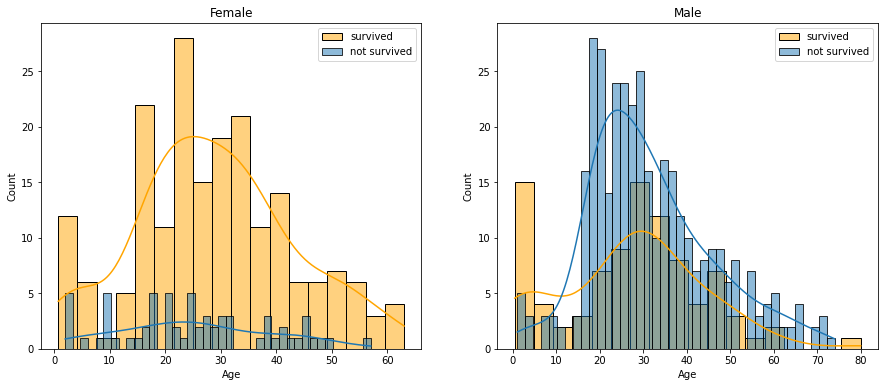

In [14]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15, 6))
women = train_data[train_data['Sex']=='female']
men = train_data[train_data['Sex']=='male']
ax = sns.histplot(women[women['Survived']==1].Age.dropna(),color = 'orange', bins=18, label = survived, ax = axes[0], kde =True)
ax = sns.histplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =True)
ax.legend()
ax.set_title('Female')
ax = sns.histplot(men[men['Survived']==1].Age.dropna(),color = 'orange', bins=18, label = survived, ax = axes[1], kde =True)
ax = sns.histplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = True)
ax.legend()
ax.set_title('Male')


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

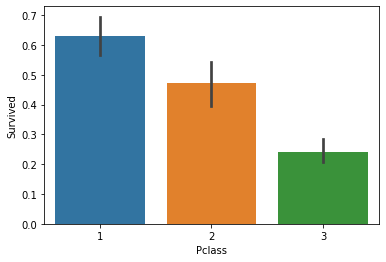

In [15]:
sns.barplot(x='Pclass', y='Survived',data=train_data)

In [16]:
data = [train_data, test_data]
for dataset in data:
    dataset['relatives'] = dataset['SibSp']+ dataset['Parch']
    dataset.loc[dataset['relatives']>0,'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
train_data['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

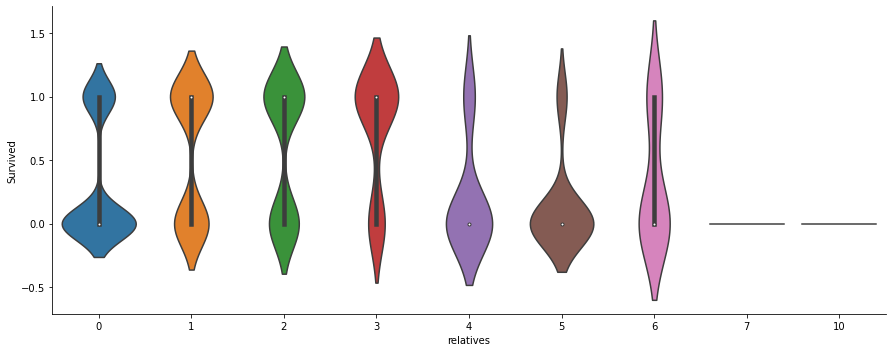

In [17]:
axes = sns.catplot(x ="relatives",y="Survived", data=train_data,aspect =2.5,kind = "violin")

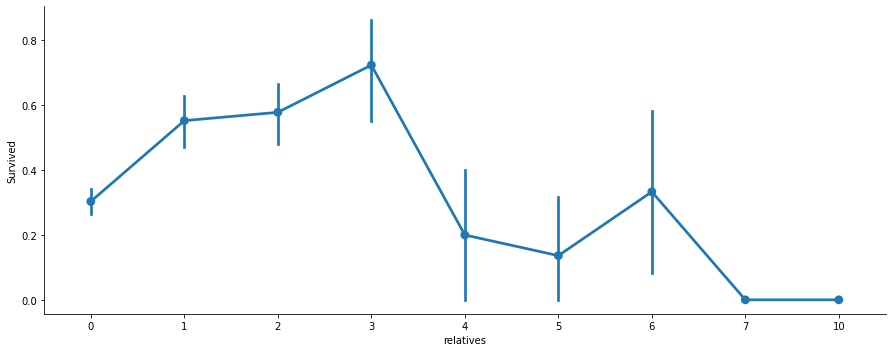

In [18]:
axes = sns.catplot(x ="relatives",y="Survived", data=train_data,aspect =2.5,kind = "point")

**Dropping columns**

In [19]:
train_data = train_data.drop(['Name'], axis =1)

In [20]:
del test_data['Name']

In [21]:
del test_data['Cabin']

In [22]:
del test_data['Ticket']

In [23]:
del train_data['Ticket']

In [24]:
del train_data['Cabin']

In [25]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          332 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Embarked     418 non-null    object 
 8   relatives    418 non-null    int64  
 9   not_alone    418 non-null    int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 32.8+ KB


In [26]:
train_data =train_data.drop(['PassengerId'], axis =1)

**Filling Missing Values**

In [27]:
data = [train_data,test_data]
for dataset in data:
    mean = train_data["Age"].mean()
    std = train_data["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    r_age = np.random.randint(mean - std,mean + std,
                              size=is_null)
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = r_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_data["Age"].astype(int)
train_data["Age"].isnull().sum()

0

In [28]:
print (dataset['Embarked'].isnull().values.any())


False


In [29]:
common_value = 'S'
data = [train_data,test_data]

for dataset in data:
    dataset["Embarked"]= dataset["Embarked"].fillna(common_value)

**Numrising the columns**

In [30]:
Sex1 = {'male': 1,'female': 0}
data = [train_data,test_data]
for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(Sex1)

In [31]:
e = {'C':1,'S':2,'Q':3}
data =[train_data,test_data]
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(e)
    dataset['Embarked'] = dataset['Embarked'].astype(int)

In [32]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    int64  
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Embarked     418 non-null    int64  
 8   relatives    418 non-null    int64  
 9   not_alone    418 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 32.8 KB


In [33]:
data = [train_data,test_data]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int) 
    dataset.loc[dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1 
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6
train_data['Age'].value_counts()

4    161
6    161
5    154
3    127
2    117
1    103
0     68
Name: Age, dtype: int64

In [34]:
data = [train_data,test_data]
for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)
    

In [35]:
data = [train_data,test_data]
for dataset in data:
    dataset['Fare'] = dataset['Fare'].astype(int)
    dataset.loc[ dataset['Fare']<=7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5

**Dropping Data**

In [36]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Survived   891 non-null    int64
 1   Pclass     891 non-null    int64
 2   Sex        891 non-null    int64
 3   Age        891 non-null    int64
 4   SibSp      891 non-null    int64
 5   Parch      891 non-null    int64
 6   Fare       891 non-null    int64
 7   Embarked   891 non-null    int64
 8   relatives  891 non-null    int64
 9   not_alone  891 non-null    int64
dtypes: int64(10)
memory usage: 69.7 KB


In [37]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Pclass       418 non-null    int64
 2   Sex          418 non-null    int64
 3   Age          418 non-null    int64
 4   SibSp        418 non-null    int64
 5   Parch        418 non-null    int64
 6   Fare         418 non-null    int64
 7   Embarked     418 non-null    int64
 8   relatives    418 non-null    int64
 9   not_alone    418 non-null    int64
dtypes: int64(10)
memory usage: 32.8 KB


In [38]:
X_train = train_data.drop("Survived", axis=1)
Y_train = train_data["Survived"]
X_test  = test_data.drop("PassengerId", axis=1).copy()

**Training**

In [39]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
print(acc_sgd)

79.91


In [40]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_predicttion = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(acc_random_forest)

90.68


In [41]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
print(acc_log)

80.02


In [42]:
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, Y_train)  
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
print(acc_knn)

87.21


In [43]:
gaussian = GaussianNB() 
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)  
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
print(acc_gaussian)

76.88


In [44]:
perceptron = Perceptron(max_iter=15)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
print(acc_perceptron)

68.46


In [45]:
linear_svc = LinearSVC(dual=False)
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
print(acc_linear_svc )

80.02


In [46]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)  
Y_pred = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
print(acc_decision_tree)

90.68


In [47]:
Final_prediction = decision_tree.predict(X_test)
Final_prediction.shape

(418,)

**Feature Importance**

In [48]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Sex,0.348
Age,0.200
Pclass,0.121
Fare,0.119
relatives,0.067
Embarked,0.062
SibSp,0.036
Parch,0.030
not_alone,0.016


**Cofusion Matrix**


In [49]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

array([[477,  72],
       [100, 242]])

***Decision Tree Classifier***


The first row is about the not-survived-predictions: **485 passengers were correctly classified as not survived** (called true negatives) **and 64 where wrongly classified as not survived** (false positives).

The second row is about the survived-predictions: **93 passengers where wrongly classified as survived** (false negatives) and **249 where correctly classified as survived** (true positives).

In [50]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': Final_prediction})
output.to_csv('submission.csv', index=False)
print('Output shape:', output.shape)
print("Your submission was successfully saved!")

Output shape: (418, 2)
Your submission was successfully saved!
